<a href="https://colab.research.google.com/github/BUGATAASHWINI/ML-Training-/blob/Code/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

# Load dataset (already cleaned and preprocessed if following previous steps)
df = pd.read_csv("/content/Titanic-Dataset.csv")
df=df.dropna()
# Basic summary statistics for numeric columns
summary = df.describe()
print("📊 Basic Summary Statistics:\n", summary)

# Median (not included in describe by default)
median_values = df.median(numeric_only=True)
print("\n🧮 Median Values:\n", median_values)

# Standard deviation (can also use separately)
std_values = df.std(numeric_only=True)
print("\n📏 Standard Deviation:\n", std_values)

# Optional: Full statistics for all columns (including categorical)
summary_all = df.describe(include='all')
print("\n📚 Full Summary (All columns):\n", summary_all)


📊 Basic Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200  

🧮 Median Values:
 PassengerId    457.0
Survived    

Data Visualization

📊 Histograms for Numerical Features:


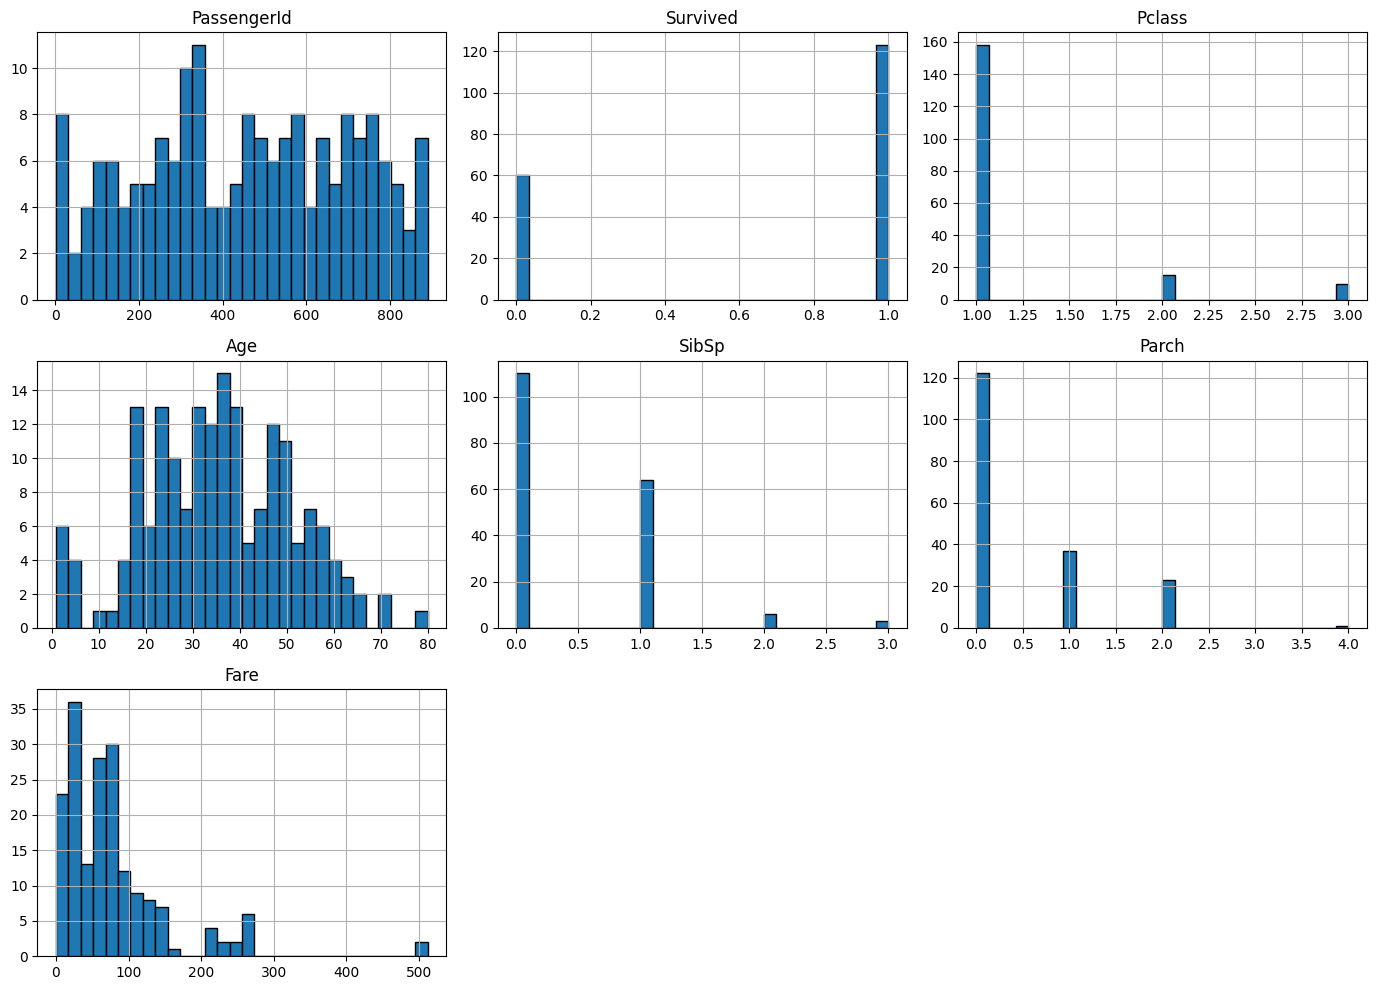

📦 Boxplots for Numerical Features:


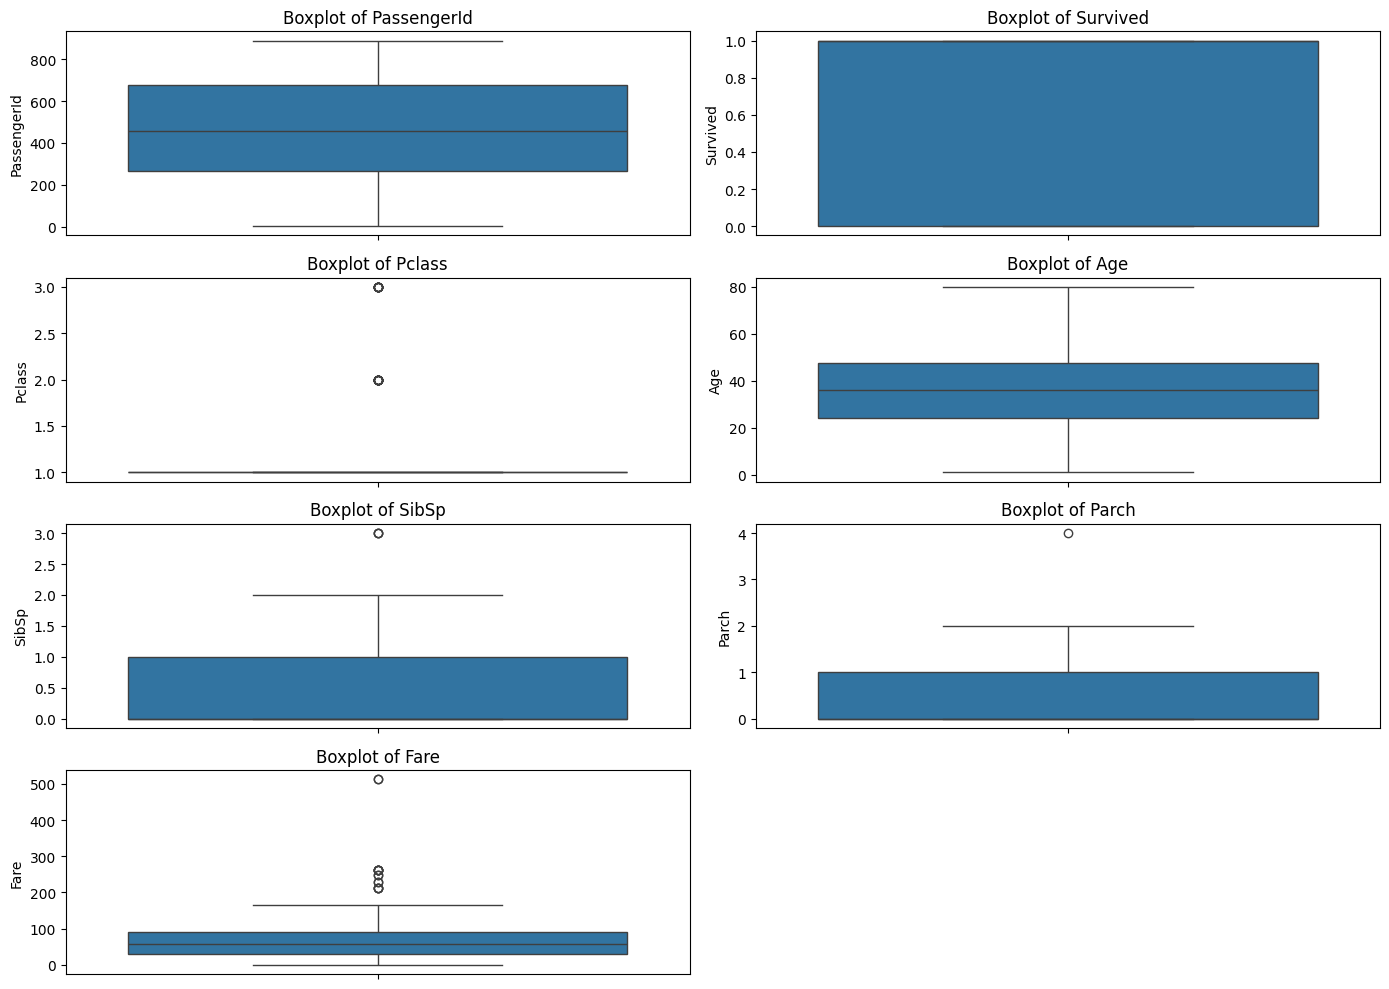

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.dropna()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
print("📊 Histograms for Numerical Features:")
df[num_cols].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Plot boxplots for each numerical column
print("📦 Boxplots for Numerical Features:")
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 1) // 2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Correlation matrix

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


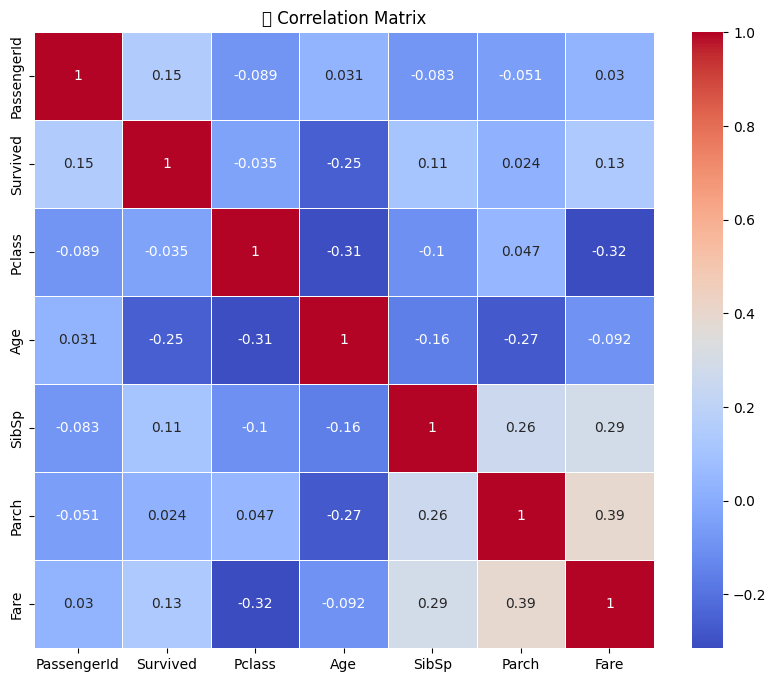

In [11]:

num_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("🔗 Correlation Matrix")
plt.show()


Pairplot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


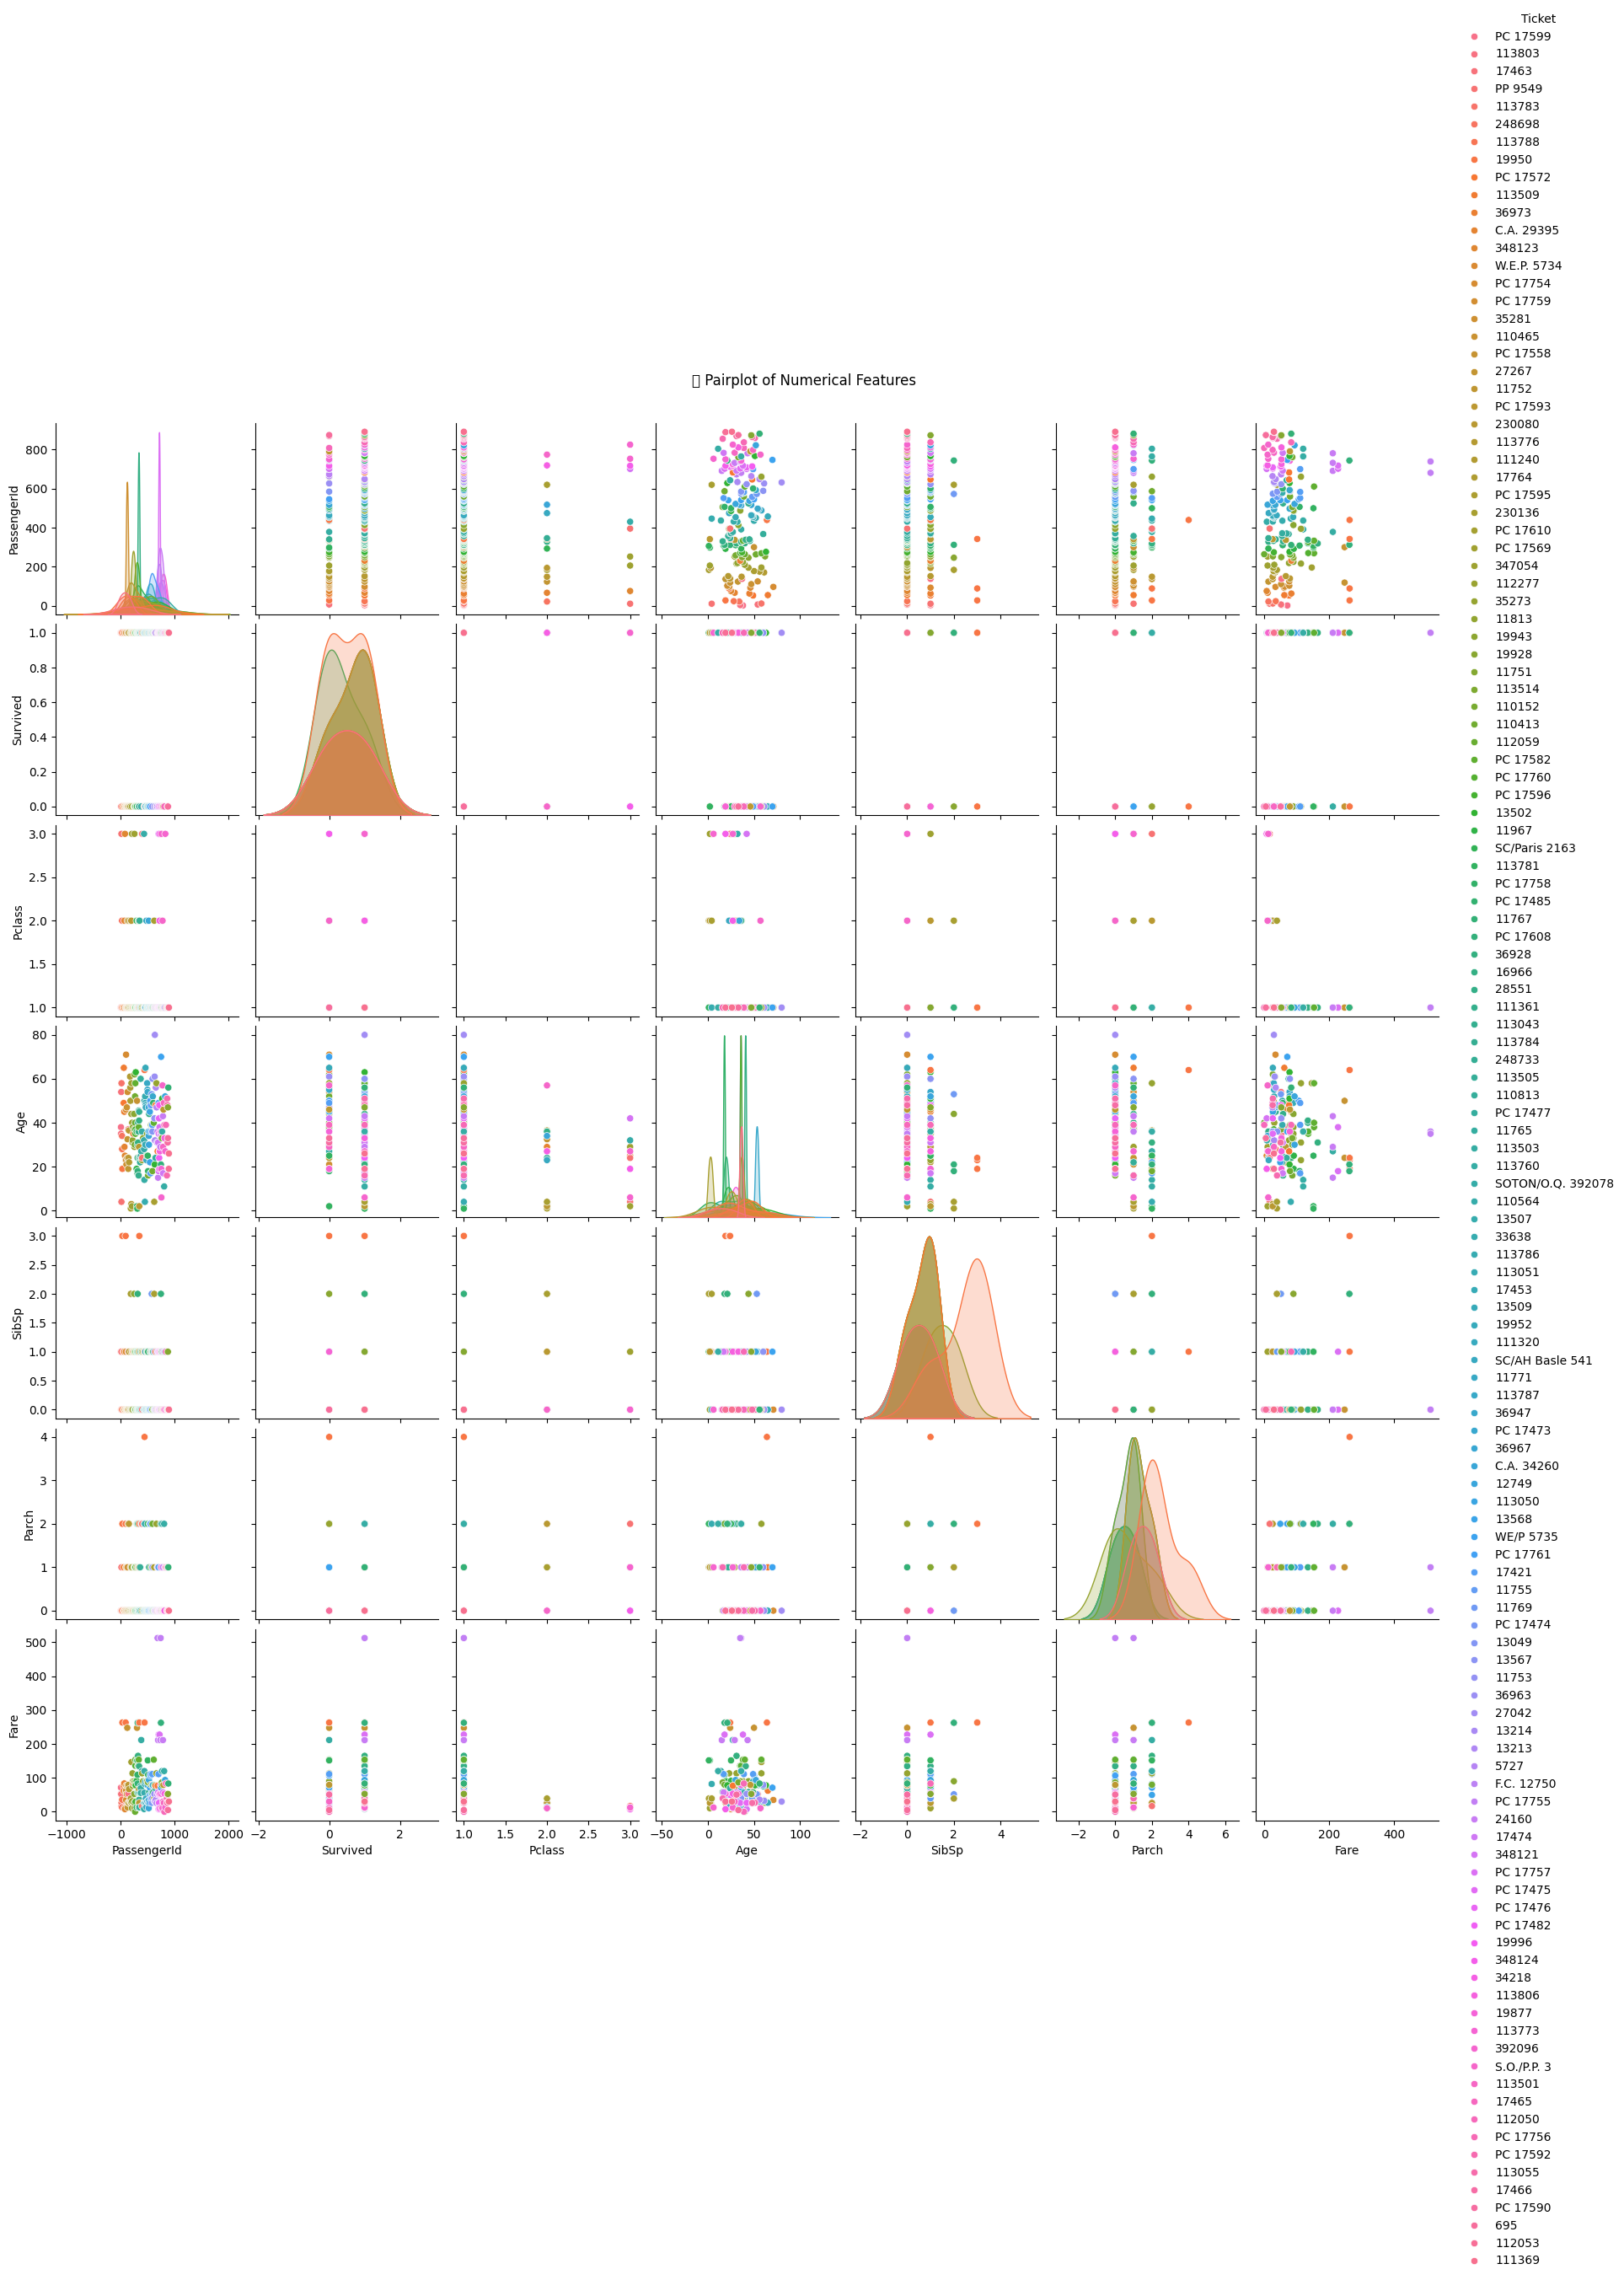

In [12]:
if 'Ticket' in df.columns:
    sns.pairplot(df[num_cols.columns.tolist() + ['Ticket']], hue='Ticket')
else:
    sns.pairplot(df[num_cols.columns.tolist()])

plt.suptitle("🔍 Pairplot of Numerical Features", y=1.02)
plt.show()

In [13]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = df[['Age', 'Fare']].apply(zscore)

# Filter extreme values (z > 3 or z < -3)
anomalies = df[(z_scores > 3).any(axis=1)]
print("🚨 Detected Anomalies:")
print(anomalies)

🚨 Detected Anomalies:
     PassengerId  Survived  Pclass                                Name   Sex  \
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez  male   
737          738         1       1              Lesurer, Mr. Gustave J  male   

      Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
679  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737  35.0      0      0  PC 17755  512.3292         B101        C  


Pclass
1    0.670886
2    0.800000
3    0.500000
Name: Survived, dtype: float64


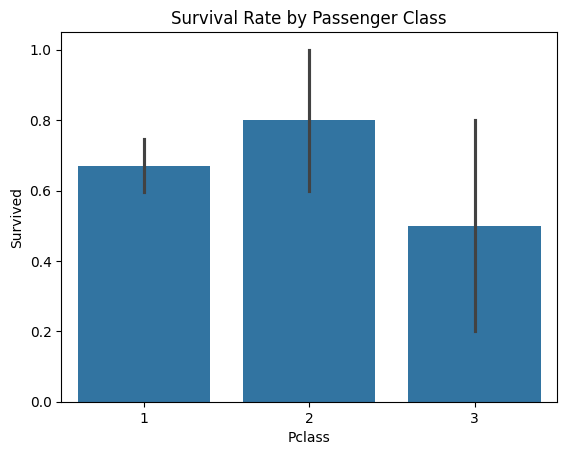

In [14]:
# Survival rate by Pclass
print(df.groupby('Pclass')['Survived'].mean())

# Bar plot
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Passenger Class")
plt.show()

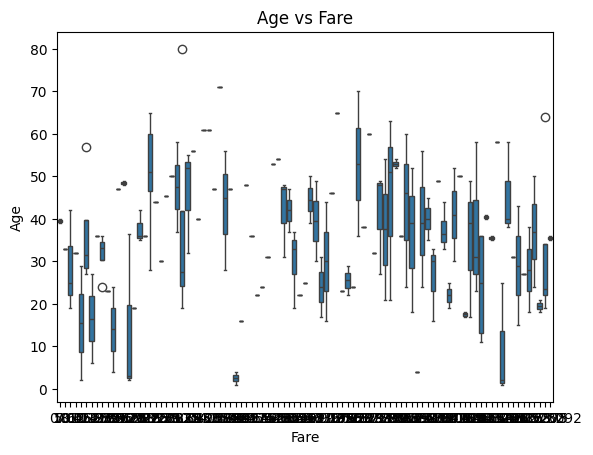

In [18]:
sns.boxplot(data=df, x='Fare', y='Age')
plt.title("Age vs Fare")
plt.show()